In [1]:
import pandas as pd
import numpy as np

In [58]:
dsKu = pd.read_csv("../data/raw/kuwait-population-estimates.csv", delimiter=";")
dsEs = pd.read_csv("../data/raw/population-estimates-and-projections-1960-2050.csv", delimiter=";")
dsPr = pd.read_csv("../data/raw/population-projections.csv", delimiter=";")
dsUs = pd.read_csv("../data/raw/u-s-regional-annual-population-estimates.csv", delimiter=";")
dsUp = pd.read_csv("../data/raw/world-urbanization-prospects-the-2018-revision-population.csv", delimiter=";")

In [59]:
dsKu.head()

,Age Group Name,Date,Frequency,Nationality Name,Sex Name,Value
0,75-79,2013,Annual,Total,Female,5003.0
1,75-79,2014,Annual,Total,Female,5428.0
2,80+,2015,Annual,Total,Female,5076.0
3,Less than one year,2016,Annual,Kuwaiti,Total,32603.0
4,15-19,2012,Annual,Kuwaiti,Total,123558.0


In [21]:
dsKu.columns

Index(['Age Group Name', 'Date', 'Frequency', 'Nationality Name', 'Sex Name',
       'Value'],
      dtype='object')

In [22]:
dsKu.count()

Age Group Name      1026
Date                1026
Frequency           1026
Nationality Name    1026
Sex Name            1026
Value               1026
dtype: int64

In [23]:
dsKu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 6 columns):
Age Group Name      1026 non-null object
Date                1026 non-null int64
Frequency           1026 non-null object
Nationality Name    1026 non-null object
Sex Name            1026 non-null object
Value               1026 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 48.2+ KB


In [24]:
dsKu.describe()

,Date,Value
count,1026.000000,1.026000e+03
mean,2014.500000,1.716504e+05
std,1.708658,4.189834e+05
min,2012.000000,1.258000e+03
25%,2013.000000,2.051075e+04
50%,2014.500000,6.165250e+04
75%,2016.000000,1.364105e+05
max,2017.000000,4.082704e+06


In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 11
plt.rcParams['patch.edgecolor'] = 'k'

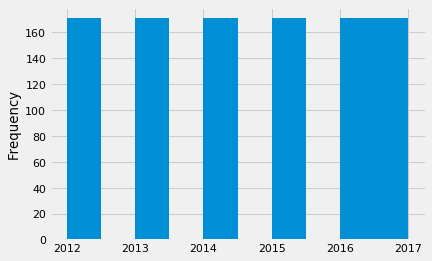

In [32]:
dsKu['Date'].plot('hist')3

In [45]:
dsEs.head()

,Year,COUNTRY,SERIES,UNIT_MEASURE,FREQ,TIME_FORMAT,UNIT_MULT,OBS_VALUE
0,1974,Algeria,Population growth (annual %),%,Annual,Annual,Units,2.762508
1,1988,Algeria,Population growth (annual %),%,Annual,Annual,Units,2.777390
2,2000,Algeria,Population growth (annual %),%,Annual,Annual,Units,1.346608
3,2006,Algeria,Population growth (annual %),%,Annual,Annual,Units,1.436793
4,2009,Algeria,Population growth (annual %),%,Annual,Annual,Units,1.682726


In [46]:
dsEs.columns

Index(['Year', 'COUNTRY', 'SERIES', 'UNIT_MEASURE', 'FREQ', 'TIME_FORMAT',
       'UNIT_MULT', 'OBS_VALUE'],
      dtype='object')

In [47]:
dsEs.describe()

,Year,OBS_VALUE
count,376565.000000,3.765650e+05
mean,2000.884248,1.309511e+06
std,25.326572,2.355504e+07
min,1960.000000,-3.570954e+06
25%,1979.000000,9.000000e+00
50%,1999.000000,3.000000e+03
75%,2020.000000,1.189000e+05
max,2050.000000,1.409963e+09


In [48]:
dsEs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376565 entries, 0 to 376564
Data columns (total 8 columns):
Year            376565 non-null int64
COUNTRY         376565 non-null object
SERIES          376565 non-null object
UNIT_MEASURE    376565 non-null object
FREQ            376565 non-null object
TIME_FORMAT     376565 non-null object
UNIT_MULT       376565 non-null object
OBS_VALUE       376565 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 23.0+ MB


In [49]:
dsEs.count()

Year            376565
COUNTRY         376565
SERIES          376565
UNIT_MEASURE    376565
FREQ            376565
TIME_FORMAT     376565
UNIT_MULT       376565
OBS_VALUE       376565
dtype: int64

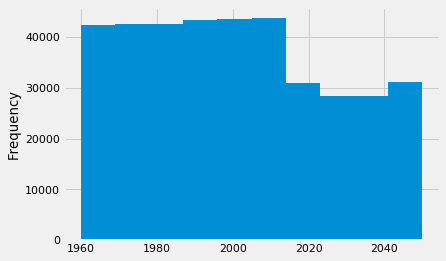

In [52]:
dsEs['Year'].plot('hist')

In [61]:
dsPr.head()

,Year,Population in 000
0,2021,1650
1,2022,1702
2,2026,1915
3,2027,1973
4,2028,2026


In [60]:
dsPr.describe()

,Year,Population in 000
count,14.0000,14.000000
mean,2025.5000,1893.714286
std,4.1833,228.244615
min,2019.0000,1550.000000
25%,2022.2500,1714.750000
50%,2025.5000,1887.000000
75%,2028.7500,2068.000000
max,2032.0000,2260.000000


In [62]:
dsPr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
Year                 14 non-null int64
Population in 000    14 non-null int64
dtypes: int64(2)
memory usage: 304.0 bytes


In [63]:
dsPr.columns

Index(['Year', 'Population in 000'], dtype='object')

In [64]:
dsPr.count()

Year                 14
Population in 000    14
dtype: int64

In [66]:
dsPr['Population in 000'] = dsPr['Population in 000'].astype(int) * 1000

The original information was showed in K (1650 instead of 1650000). In order to solve that we multiplied each value to 1000 and renamed the column to "Population".

In [67]:
dsPr.head()

,Year,Population in 000
0,2021,1650000
1,2022,1702000
2,2026,1915000
3,2027,1973000
4,2028,2026000


In [68]:
dsPr.rename(columns={'Population in 000':'Population'}, 
                 inplace=True)

In [69]:
dsPr.head()

,Year,Population
0,2021,1650000
1,2022,1702000
2,2026,1915000
3,2027,1973000
4,2028,2026000


In [70]:
dsPr.describe()

,Year,Population
count,14.0000,1.400000e+01
mean,2025.5000,1.893714e+06
std,4.1833,2.282446e+05
min,2019.0000,1.550000e+06
25%,2022.2500,1.714750e+06
50%,2025.5000,1.887000e+06
75%,2028.7500,2.068000e+06
max,2032.0000,2.260000e+06


In [71]:
dsUs.head()

,Date,Frequency,Region,Value,Variable Name
0,2001,Annual,United States,284968955.0,Intercensal Estimates of the Resident Populati...
1,2005,Annual,United States,295516599.0,Intercensal Estimates of the Resident Populati...
2,2008,Annual,United States,304093966.0,Intercensal Estimates of the Resident Populati...
3,2009,Annual,United States,306771529.0,Intercensal Estimates of the Resident Populati...
4,2002,Annual,Northeast,54143915.0,Intercensal Estimates of the Resident Populati...


In [72]:
dsUs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 5 columns):
Date             1026 non-null int64
Frequency        1026 non-null object
Region           1026 non-null object
Value            1026 non-null float64
Variable Name    1026 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 40.2+ KB


In [73]:
dsUs.columns

Index(['Date', 'Frequency', 'Region', 'Value', 'Variable Name'], dtype='object')

In [74]:
dsUs.count()

Date             1026
Frequency        1026
Region           1026
Value            1026
Variable Name    1026
dtype: int64

In [75]:
dsUs['Variable Name']

0       Intercensal Estimates of the Resident Populati...
1       Intercensal Estimates of the Resident Populati...
2       Intercensal Estimates of the Resident Populati...
3       Intercensal Estimates of the Resident Populati...
4       Intercensal Estimates of the Resident Populati...
5       Intercensal Estimates of the Resident Populati...
6       Intercensal Estimates of the Resident Populati...
7       Intercensal Estimates of the Resident Populati...
8       Intercensal Estimates of the Resident Populati...
9       Intercensal Estimates of the Resident Populati...
10      Intercensal Estimates of the Resident Populati...
11      Intercensal Estimates of the Resident Populati...
12      Intercensal Estimates of the Resident Populati...
13      Intercensal Estimates of the Resident Populati...
14      Intercensal Estimates of the Resident Populati...
15      Intercensal Estimates of the Resident Populati...
16      Intercensal Estimates of the Resident Populati...
17      Interc

In [76]:
dsUs = dsUs.drop(columns="Variable Name")

We deleted the columns "Variable Name" since it just had the same value repeated.

In [77]:
dsUs.columns

Index(['Date', 'Frequency', 'Region', 'Value'], dtype='object')

In [78]:
dsUs.describe()

,Date,Value
count,1026.000000,1.026000e+03
mean,2008.500000,1.609881e+07
std,5.190658,4.344608e+07
min,2000.000000,4.943000e+05
25%,2004.000000,1.835481e+06
50%,2008.500000,4.548554e+06
75%,2013.000000,9.089939e+06
max,2017.000000,3.257192e+08


In [79]:
dsUs.head()

,Date,Frequency,Region,Value
0,2001,Annual,United States,284968955.0
1,2005,Annual,United States,295516599.0
2,2008,Annual,United States,304093966.0
3,2009,Annual,United States,306771529.0
4,2002,Annual,Northeast,54143915.0


In [80]:
dsUp.head()

,country,COUNTRY_NOTES,DATE,FREQUENCY,VALUE,variable,unit
0,Azerbaijan,(9) Including Nagorno-Karabakh.,2010,Annual,0.692846,Average Annual Rate of Change of the Rural Pop...,%
1,Bahrain,NaN,1980,Annual,4.446884,Average Annual Rate of Change of the Rural Pop...,%
2,Bahrain,NaN,2010,Annual,6.296585,Average Annual Rate of Change of the Rural Pop...,%
3,Bahrain,NaN,2040,Annual,-0.723549,Average Annual Rate of Change of the Rural Pop...,%
4,Bahrain,NaN,2050,Annual,-1.036793,Average Annual Rate of Change of the Rural Pop...,%


In [81]:
dsUp.columns

Index(['country', 'COUNTRY_NOTES', 'DATE', 'FREQUENCY', 'VALUE', 'variable',
       'unit'],
      dtype='object')

In [86]:
dsUp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137592 entries, 0 to 137591
Data columns (total 7 columns):
country          137592 non-null object
COUNTRY_NOTES    17640 non-null object
DATE             137592 non-null int64
FREQUENCY        137592 non-null object
VALUE            137592 non-null float64
variable         137592 non-null object
unit             137592 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 7.3+ MB


In [83]:
dsUp.count()

country          137592
COUNTRY_NOTES     17640
DATE             137592
FREQUENCY        137592
VALUE            137592
variable         137592
unit             137592
dtype: int64

In [84]:
dsUp = dsUp.where((pd.notnull(dsUp)), None)

In [85]:
dsUp.count()

country          137592
COUNTRY_NOTES     17640
DATE             137592
FREQUENCY        137592
VALUE            137592
variable         137592
unit             137592
dtype: int64

In [88]:
dsUp.describe()

,DATE,VALUE
count,137592.000000,1.375920e+05
mean,2000.496032,7.655607e+04
std,29.108074,4.413885e+05
min,1950.000000,-5.370025e+01
25%,1975.000000,1.122700e+01
50%,2000.000000,9.420600e+01
75%,2025.000000,5.753037e+03
max,2050.000000,9.771823e+06


In [89]:
dsUp.head()

,country,COUNTRY_NOTES,DATE,FREQUENCY,VALUE,variable,unit
0,Azerbaijan,(9) Including Nagorno-Karabakh.,2010,Annual,0.692846,Average Annual Rate of Change of the Rural Pop...,%
1,Bahrain,None,1980,Annual,4.446884,Average Annual Rate of Change of the Rural Pop...,%
2,Bahrain,None,2010,Annual,6.296585,Average Annual Rate of Change of the Rural Pop...,%
3,Bahrain,None,2040,Annual,-0.723549,Average Annual Rate of Change of the Rural Pop...,%
4,Bahrain,None,2050,Annual,-1.036793,Average Annual Rate of Change of the Rural Pop...,%


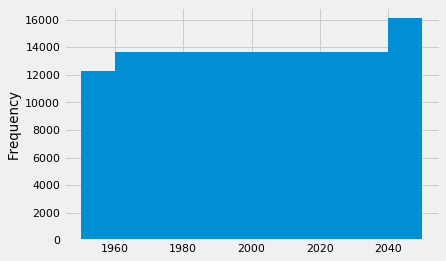

In [91]:
dsUp['DATE'].plot('hist')